In [22]:
import tensorflow as tf
import json 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
#Setting Our Hyper-Parameters!!
vocab_size=10000
embedding_dim=16
max_length=32
trunc_type="post"
padding_type='post'
ook_tok="<OOV>"
training_size=20000

In [24]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-01-31 18:21:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 172.217.164.176, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2021-01-31 18:21:10 (281 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [25]:
with open('/tmp/sarcasm.json') as f:
  datastore=json.load(f)

In [26]:
sentences=[]
labels=[]
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])


In [33]:
#Splitting The Data
training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[0:training_size]
testing_labels=labels[training_size:]

In [29]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=ook_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index


training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)



In [35]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [36]:
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                           tf.keras.layers.GlobalAveragePooling1D(),
                           tf.keras.layers.Dense(24,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')
])

In [37]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
num_epochs=30
history_1=model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded,testing_labels),verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.5571 - accuracy: 0.7089 - val_loss: 0.3991 - val_accuracy: 0.8337
Epoch 2/30
625/625 - 2s - loss: 0.3098 - accuracy: 0.8755 - val_loss: 0.3443 - val_accuracy: 0.8533
Epoch 3/30
625/625 - 2s - loss: 0.2312 - accuracy: 0.9103 - val_loss: 0.3609 - val_accuracy: 0.8420
Epoch 4/30
625/625 - 2s - loss: 0.1867 - accuracy: 0.9283 - val_loss: 0.3766 - val_accuracy: 0.8495
Epoch 5/30
625/625 - 2s - loss: 0.1538 - accuracy: 0.9426 - val_loss: 0.4014 - val_accuracy: 0.8478
Epoch 6/30
625/625 - 2s - loss: 0.1305 - accuracy: 0.9531 - val_loss: 0.4341 - val_accuracy: 0.8460
Epoch 7/30
625/625 - 2s - loss: 0.1114 - accuracy: 0.9612 - val_loss: 0.4715 - val_accuracy: 0.8399
Epoch 8/30
625/625 - 2s - loss: 0.0959 - accuracy: 0.9685 - val_loss: 0.5289 - val_accuracy: 0.8381
Epoch 9/30
625/625 - 2s - loss: 0.0828 - accuracy: 0.9730 - val_loss: 0.5860 - val_accuracy: 0.8304
Epoch 10/30
625/625 - 2s - loss: 0.0714 - accuracy: 0.9765 - val_loss: 0.6304 - val_accuracy: 0.8317

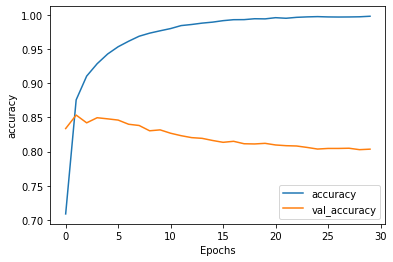

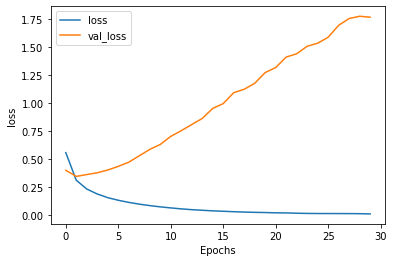

In [40]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history_1.history[string])
  plt.plot(history_1.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history_1, "accuracy")
plot_graphs(history_1, "loss")

In [41]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [43]:
# #Try change in parameters for better results_--->
# vocab_size=1000
# embedding_dim=16
# max_length=16
# trunc_type="post"
# padding_type='post'
# ook_tok="<OOV>"
# training_size=20000